In [1]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import nlp
import shap
import shap.benchmark as benchmark

In [2]:
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-xsum-12-6")
model =  AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-xsum-12-6")

In [3]:
dataset = nlp.load_dataset('xsum',split='train')

Using custom data configuration default


In [4]:
s = dataset['document'][0:1]

In [5]:
explainer = shap.Explainer(model,tokenizer)

In [6]:
shap_values = explainer(s)

Partition explainer: 2it [00:35, 17.86s/it]               


In [7]:
sort_order = 'positive'
perturbation = 'keep'

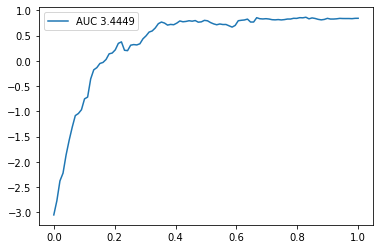

In [8]:
sp = benchmark.perturbation.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
xs, ys, auc = sp.model_score(shap_values, s)
sp.plot(xs, ys, auc)